In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Loan_Data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
data.shape

(614, 13)

In [7]:
data = data.dropna()

In [8]:
data.shape

(480, 13)

In [9]:
from collections import Counter

In [10]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
list(Counter(data['Gender']))

['Male', 'Female']

# Clearning data

In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
all_text_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [16]:
from tqdm.auto import tqdm

In [17]:
for text_columns in tqdm(all_text_columns):
    data[text_columns] = label_encoder.fit_transform(data[text_columns])

  0%|          | 0/7 [00:00<?, ?it/s]

In [18]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [19]:
data = data.drop(['Loan_ID'],axis=1)

In [20]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [21]:
data = data.astype(np.float64)

In [22]:
data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0


In [24]:
Counter(data.Loan_Status)

Counter({0.0: 148, 1.0: 332})

# Data visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Vlaso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


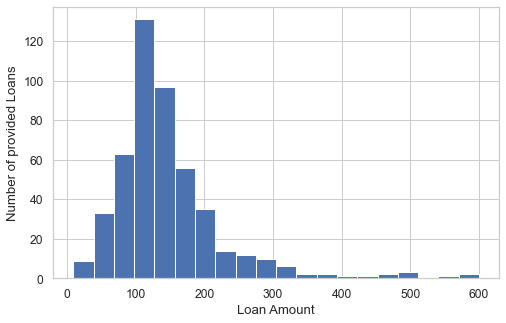

In [26]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['LoanAmount'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Loan Amount', ylabel='Number of provided Loans');

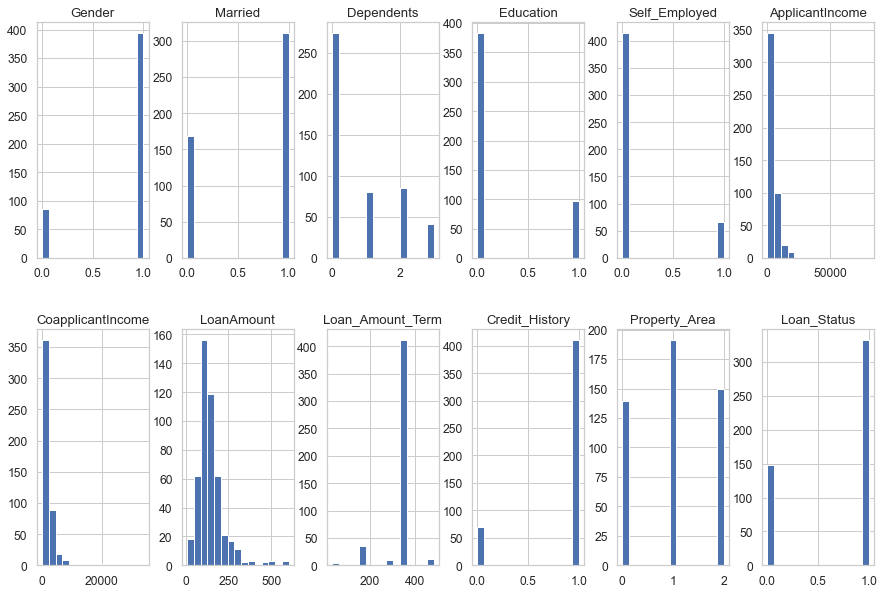

In [27]:
data.hist(bins=15, figsize=(15, 10), layout=(2, 6));

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

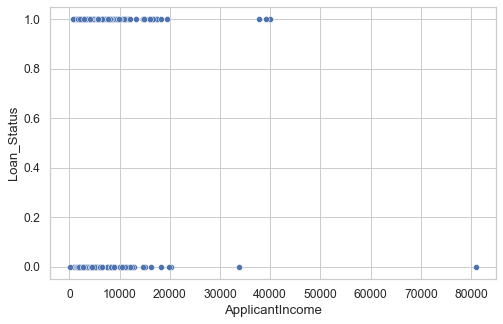

In [28]:
sns.scatterplot(x=data['ApplicantIncome'], y=data['Loan_Status'])

<AxesSubplot:>

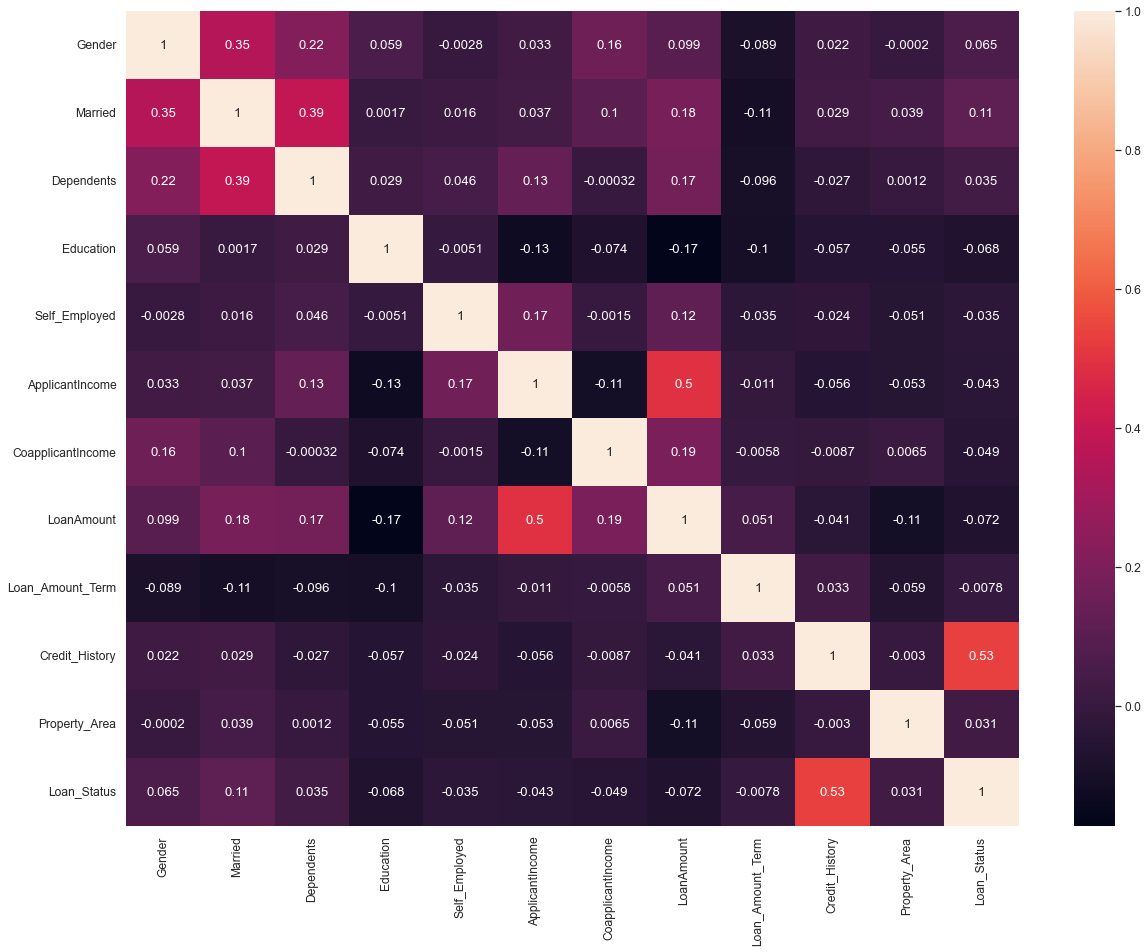

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

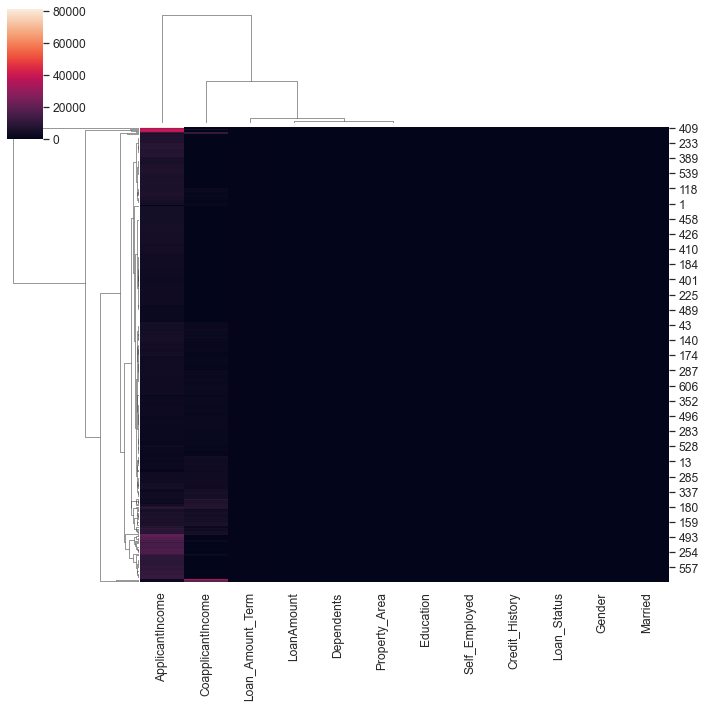

In [30]:
sns.clustermap(data)

# Binary classification

In [31]:
import xgboost, catboost

In [32]:
xgb = xgboost.XGBClassifier()
cbt = catboost.CatBoostClassifier()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Loan_Status'],axis=1), data['Loan_Status'], test_size=0.3)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 11), (144, 11), (336,), (144,))

In [37]:
y_train

92     1.0
412    0.0
196    1.0
99     1.0
384    0.0
      ... 
94     1.0
388    1.0
52     0.0
406    1.0
55     1.0
Name: Loan_Status, Length: 336, dtype: float64

In [38]:
xgb.fit(X_train, y_train).score(X_test, y_test)

0.7361111111111112

In [39]:
cbt.fit(X_train, y_train)

Learning rate set to 0.006467
0:	learn: 0.6892934	total: 142ms	remaining: 2m 21s
1:	learn: 0.6854174	total: 144ms	remaining: 1m 11s
2:	learn: 0.6818438	total: 147ms	remaining: 48.8s
3:	learn: 0.6783524	total: 149ms	remaining: 37.2s
4:	learn: 0.6749152	total: 152ms	remaining: 30.2s
5:	learn: 0.6715175	total: 154ms	remaining: 25.6s
6:	learn: 0.6679172	total: 157ms	remaining: 22.2s
7:	learn: 0.6643790	total: 159ms	remaining: 19.7s
8:	learn: 0.6609579	total: 162ms	remaining: 17.8s
9:	learn: 0.6576020	total: 164ms	remaining: 16.3s
10:	learn: 0.6543137	total: 167ms	remaining: 15s
11:	learn: 0.6505996	total: 169ms	remaining: 13.9s
12:	learn: 0.6472362	total: 174ms	remaining: 13.2s
13:	learn: 0.6442270	total: 176ms	remaining: 12.4s
14:	learn: 0.6408518	total: 179ms	remaining: 11.8s
15:	learn: 0.6377965	total: 183ms	remaining: 11.2s
16:	learn: 0.6349503	total: 186ms	remaining: 10.8s
17:	learn: 0.6319343	total: 189ms	remaining: 10.3s
18:	learn: 0.6286860	total: 192ms	remaining: 9.91s
19:	learn: 

194:	learn: 0.4108516	total: 667ms	remaining: 2.75s
195:	learn: 0.4103166	total: 670ms	remaining: 2.75s
196:	learn: 0.4099445	total: 672ms	remaining: 2.74s
197:	learn: 0.4093860	total: 674ms	remaining: 2.73s
198:	learn: 0.4090097	total: 677ms	remaining: 2.72s
199:	learn: 0.4083212	total: 679ms	remaining: 2.72s
200:	learn: 0.4078934	total: 682ms	remaining: 2.71s
201:	learn: 0.4073926	total: 721ms	remaining: 2.85s
202:	learn: 0.4068238	total: 725ms	remaining: 2.85s
203:	learn: 0.4063128	total: 729ms	remaining: 2.85s
204:	learn: 0.4057128	total: 733ms	remaining: 2.84s
205:	learn: 0.4051844	total: 737ms	remaining: 2.84s
206:	learn: 0.4046718	total: 741ms	remaining: 2.84s
207:	learn: 0.4044001	total: 745ms	remaining: 2.84s
208:	learn: 0.4038763	total: 749ms	remaining: 2.83s
209:	learn: 0.4033402	total: 758ms	remaining: 2.85s
210:	learn: 0.4030860	total: 762ms	remaining: 2.85s
211:	learn: 0.4025087	total: 765ms	remaining: 2.84s
212:	learn: 0.4019032	total: 769ms	remaining: 2.84s
213:	learn: 

371:	learn: 0.3452414	total: 1.33s	remaining: 2.25s
372:	learn: 0.3450098	total: 1.34s	remaining: 2.25s
373:	learn: 0.3448301	total: 1.34s	remaining: 2.24s
374:	learn: 0.3444758	total: 1.34s	remaining: 2.24s
375:	learn: 0.3442913	total: 1.35s	remaining: 2.24s
376:	learn: 0.3440353	total: 1.35s	remaining: 2.23s
377:	learn: 0.3436800	total: 1.35s	remaining: 2.23s
378:	learn: 0.3434407	total: 1.36s	remaining: 2.22s
379:	learn: 0.3431924	total: 1.36s	remaining: 2.22s
380:	learn: 0.3429428	total: 1.36s	remaining: 2.22s
381:	learn: 0.3425417	total: 1.37s	remaining: 2.21s
382:	learn: 0.3420892	total: 1.37s	remaining: 2.21s
383:	learn: 0.3418120	total: 1.38s	remaining: 2.21s
384:	learn: 0.3415756	total: 1.38s	remaining: 2.2s
385:	learn: 0.3411183	total: 1.38s	remaining: 2.2s
386:	learn: 0.3408312	total: 1.38s	remaining: 2.19s
387:	learn: 0.3406071	total: 1.39s	remaining: 2.19s
388:	learn: 0.3404099	total: 1.39s	remaining: 2.19s
389:	learn: 0.3402583	total: 1.4s	remaining: 2.18s
390:	learn: 0.3

533:	learn: 0.3045170	total: 1.83s	remaining: 1.6s
534:	learn: 0.3041390	total: 1.83s	remaining: 1.59s
535:	learn: 0.3039664	total: 1.83s	remaining: 1.59s
536:	learn: 0.3039386	total: 1.83s	remaining: 1.58s
537:	learn: 0.3036851	total: 1.84s	remaining: 1.58s
538:	learn: 0.3033833	total: 1.84s	remaining: 1.58s
539:	learn: 0.3030434	total: 1.85s	remaining: 1.57s
540:	learn: 0.3029968	total: 1.85s	remaining: 1.57s
541:	learn: 0.3028839	total: 1.85s	remaining: 1.56s
542:	learn: 0.3027420	total: 1.85s	remaining: 1.56s
543:	learn: 0.3026182	total: 1.85s	remaining: 1.55s
544:	learn: 0.3023109	total: 1.86s	remaining: 1.55s
545:	learn: 0.3021030	total: 1.86s	remaining: 1.55s
546:	learn: 0.3018848	total: 1.86s	remaining: 1.54s
547:	learn: 0.3014780	total: 1.87s	remaining: 1.54s
548:	learn: 0.3013232	total: 1.87s	remaining: 1.53s
549:	learn: 0.3011180	total: 1.87s	remaining: 1.53s
550:	learn: 0.3009588	total: 1.87s	remaining: 1.53s
551:	learn: 0.3007722	total: 1.88s	remaining: 1.52s
552:	learn: 0

706:	learn: 0.2700803	total: 2.32s	remaining: 963ms
707:	learn: 0.2699868	total: 2.33s	remaining: 960ms
708:	learn: 0.2698244	total: 2.33s	remaining: 956ms
709:	learn: 0.2695170	total: 2.33s	remaining: 953ms
710:	learn: 0.2692347	total: 2.33s	remaining: 949ms
711:	learn: 0.2691642	total: 2.34s	remaining: 946ms
712:	learn: 0.2690567	total: 2.34s	remaining: 943ms
713:	learn: 0.2688370	total: 2.34s	remaining: 939ms
714:	learn: 0.2687011	total: 2.35s	remaining: 936ms
715:	learn: 0.2684884	total: 2.35s	remaining: 932ms
716:	learn: 0.2683919	total: 2.35s	remaining: 929ms
717:	learn: 0.2682101	total: 2.35s	remaining: 925ms
718:	learn: 0.2680376	total: 2.36s	remaining: 922ms
719:	learn: 0.2679581	total: 2.36s	remaining: 918ms
720:	learn: 0.2676417	total: 2.36s	remaining: 915ms
721:	learn: 0.2675280	total: 2.37s	remaining: 911ms
722:	learn: 0.2673074	total: 2.37s	remaining: 907ms
723:	learn: 0.2671850	total: 2.37s	remaining: 904ms
724:	learn: 0.2670631	total: 2.37s	remaining: 900ms
725:	learn: 

892:	learn: 0.2379617	total: 2.84s	remaining: 341ms
893:	learn: 0.2377592	total: 2.85s	remaining: 338ms
894:	learn: 0.2375052	total: 2.85s	remaining: 334ms
895:	learn: 0.2373458	total: 2.85s	remaining: 331ms
896:	learn: 0.2370973	total: 2.86s	remaining: 328ms
897:	learn: 0.2368977	total: 2.86s	remaining: 325ms
898:	learn: 0.2367903	total: 2.87s	remaining: 322ms
899:	learn: 0.2367140	total: 2.87s	remaining: 319ms
900:	learn: 0.2364965	total: 2.87s	remaining: 316ms
901:	learn: 0.2363708	total: 2.88s	remaining: 313ms
902:	learn: 0.2362281	total: 2.88s	remaining: 309ms
903:	learn: 0.2360628	total: 2.88s	remaining: 306ms
904:	learn: 0.2359118	total: 2.88s	remaining: 303ms
905:	learn: 0.2357519	total: 2.89s	remaining: 300ms
906:	learn: 0.2355281	total: 2.89s	remaining: 297ms
907:	learn: 0.2354294	total: 2.9s	remaining: 293ms
908:	learn: 0.2352699	total: 2.9s	remaining: 290ms
909:	learn: 0.2350626	total: 2.9s	remaining: 287ms
910:	learn: 0.2349982	total: 2.9s	remaining: 284ms
911:	learn: 0.23

In [40]:
cbt.score(X_test, y_test)

0.7638888888888888

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras import Sequential

In [38]:
from tensorflow.keras.layers import *

In [315]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(750, activation='relu'))
#model.add(Dropout(0.50))
model.add(Dense(1, activation='softmax'))

In [316]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 11)                0         
                                                                 
 dense_69 (Dense)            (None, 250)               3000      
                                                                 
 dropout_33 (Dropout)        (None, 250)               0         
                                                                 
 dense_70 (Dense)            (None, 1)                 251       
                                                                 
Total params: 3,251
Trainable params: 3,251
Non-trainable params: 0
_________________________________________________________________


In [317]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [318]:
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 2s 206ms/step - loss: 328.1894 - accuracy: 0.6607 - val_loss: 130.5107 - val_accuracy: 0.7639
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 230.4087 - accuracy: 0.6607 - val_loss: 92.3590 - val_accuracy: 0.7639
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 215.2411 - accuracy: 0.6607 - val_loss: 146.7007 - val_accuracy: 0.7639
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 216.9989 - accuracy: 0.6607 - val_loss: 149.9776 - val_accuracy: 0.7639
Epoch 5/100
3/3 [==============================] - 0s 42ms/step - loss: 204.7859 - accuracy: 0.6607 - val_loss: 122.2609 - val_accuracy: 0.7639
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 216.8829 - accuracy: 0.6607 - val_loss: 83.6170 - val_accuracy: 0.7639
Epoch 7/100
3/3 [==============================] - 0s 37ms/step - loss: 197.2264 - accuracy: 0.6607 - val_loss: 46.3671 - val_accuracy: 0

Epoch 58/100
3/3 [==============================] - 0s 37ms/step - loss: 68.6495 - accuracy: 0.6607 - val_loss: 16.4550 - val_accuracy: 0.7639
Epoch 59/100
3/3 [==============================] - 0s 29ms/step - loss: 81.2561 - accuracy: 0.6607 - val_loss: 20.0839 - val_accuracy: 0.7639
Epoch 60/100
3/3 [==============================] - 0s 31ms/step - loss: 82.6272 - accuracy: 0.6607 - val_loss: 31.2151 - val_accuracy: 0.7639
Epoch 61/100
3/3 [==============================] - 0s 33ms/step - loss: 80.7617 - accuracy: 0.6607 - val_loss: 39.9720 - val_accuracy: 0.7639
Epoch 62/100
3/3 [==============================] - 0s 29ms/step - loss: 67.2725 - accuracy: 0.6607 - val_loss: 30.4438 - val_accuracy: 0.7639
Epoch 63/100
3/3 [==============================] - 0s 35ms/step - loss: 67.3709 - accuracy: 0.6607 - val_loss: 14.7403 - val_accuracy: 0.7639
Epoch 64/100
3/3 [==============================] - 0s 31ms/step - loss: 73.7632 - accuracy: 0.6607 - val_loss: 11.4104 - val_accuracy: 0.7639

In [319]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [320]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [321]:
cm

array([[  0,  34],
       [  0, 110]], dtype=int64)

In [322]:
accuracy

0.7638888888888888